In [1]:
import sys
sys.path.append('/home/kal/TF_models/bin/')
import numpy as np
import matplotlib.pyplot as plt
import eval_TFmodel
import sequence
import train_TFmodel
import viz_sequence
import helper

Using TensorFlow backend.
/home/kal/TF_models/bin/sequence.py:275: RuntimeWarning: divide by zero encountered in log
  self.seq = helper.softmax(np.log(dist))


In [22]:
#load a model and grab a sequence
reg = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_regression/20170920_regression_model/')
seq = train_TFmodel.random_seq()
seq = sequence.SeqDist(helper.softmax(seq.seq + 1))

Initial Sequence


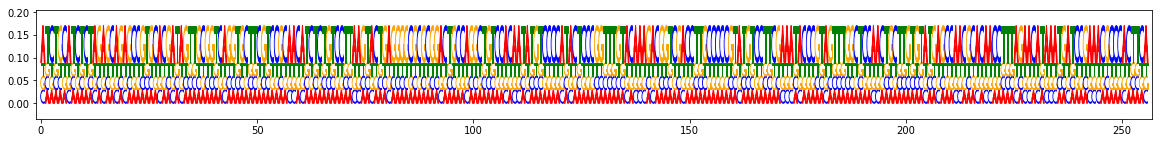

Model Prediction: 16.12133
Masked average prediciton difference


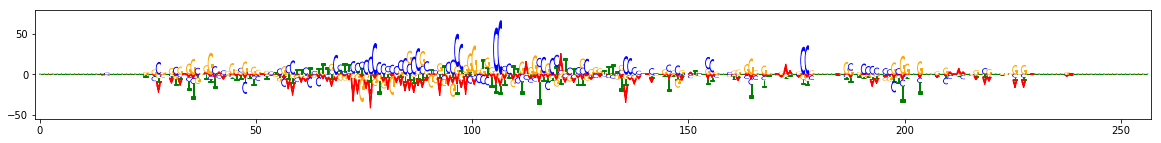

Information Content of Softmax prediction difference


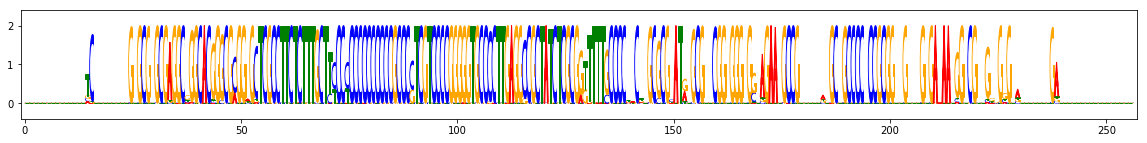

Weighted log-odds of the Sequence Distribution


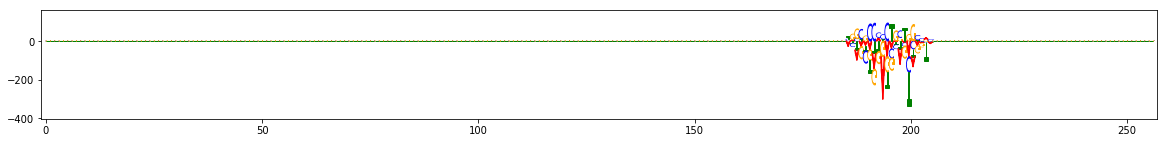

PWM score: -1489.1278447941681
Sequence after 0 iterations


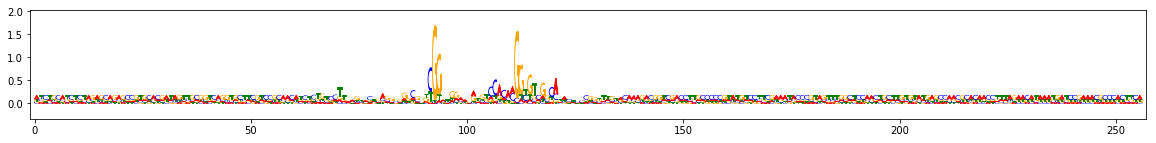

Sequence after 25 iterations


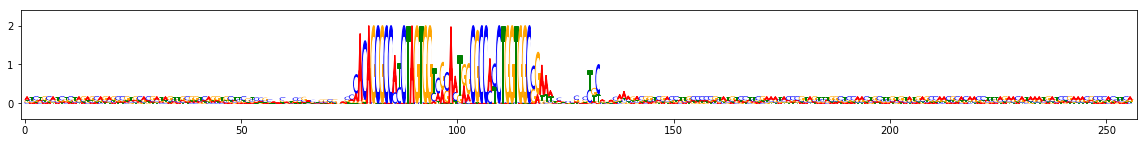

Sequence after 50 iterations


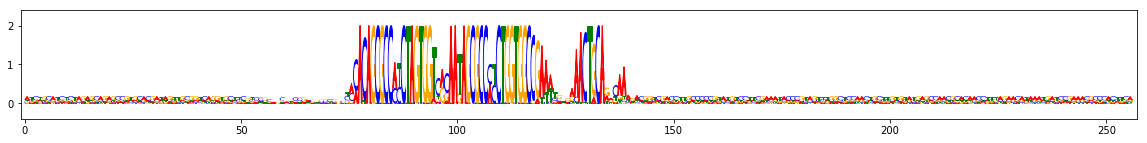

Sequence after 75 iterations


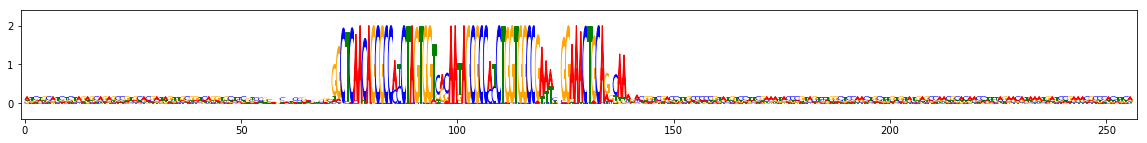

Final sequence


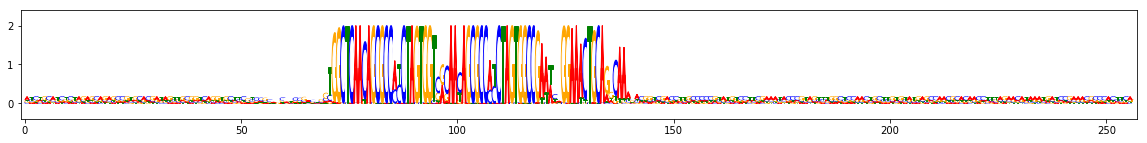

Model Prediction: 3368.7888
Masked average prediciton difference


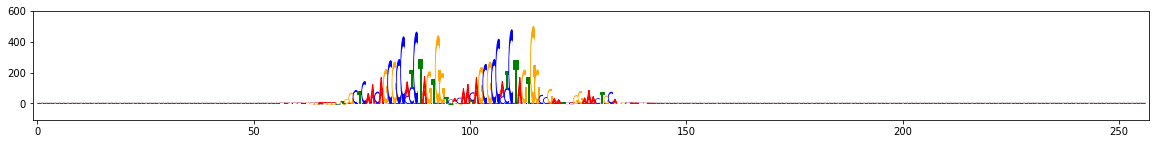

Information Content of Softmax prediction difference


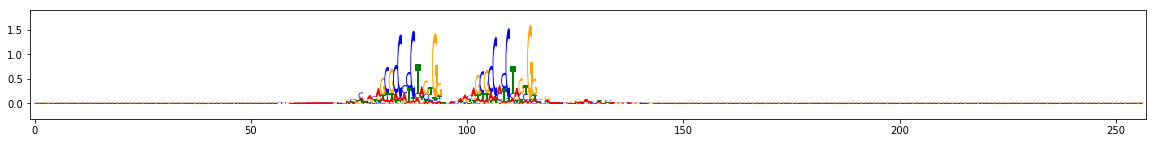

Weighted log-odds of the Sequence Distribution


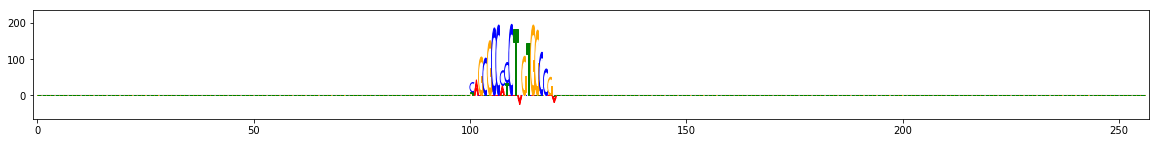

PWM score: 2179.9485956799376


In [24]:
dream = reg.gumbel_dream(seq, 'standard', viz=True, num_iterations=100, step=.01)

Discrete Sequence passed - converting to a distibution via pseudocount
Step 0.034129089416615514
Initial Sequence


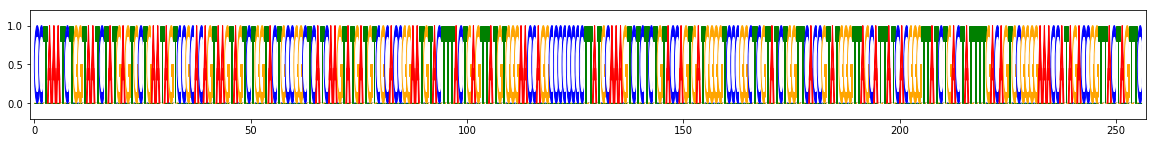

Model Prediction: 70.68617
Masked average prediciton difference


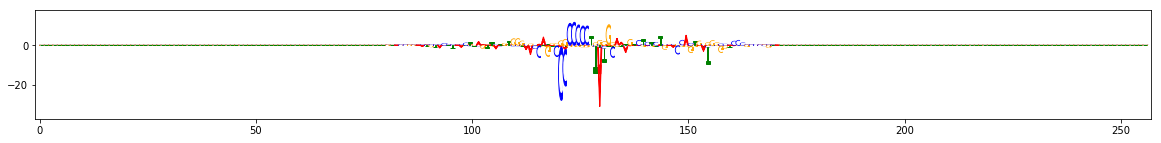

Information Content of Softmax prediction difference


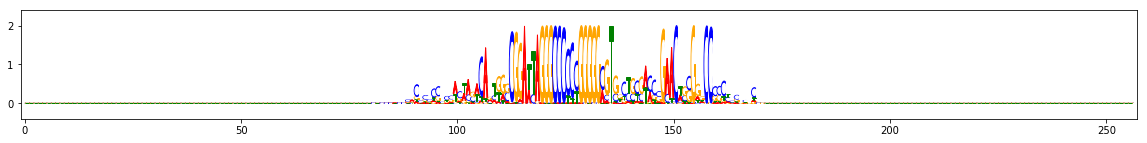

Weighted log-odds of the Sequence Distribution


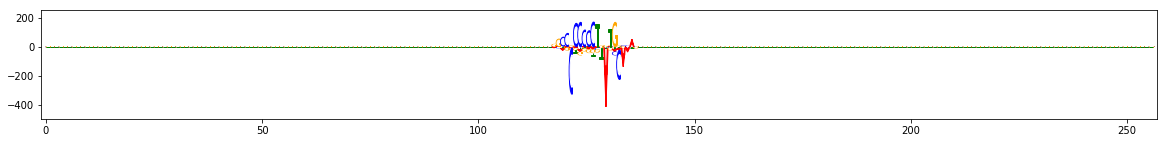

PWM score: -146.9490628775992
Sequence after 0 iterations


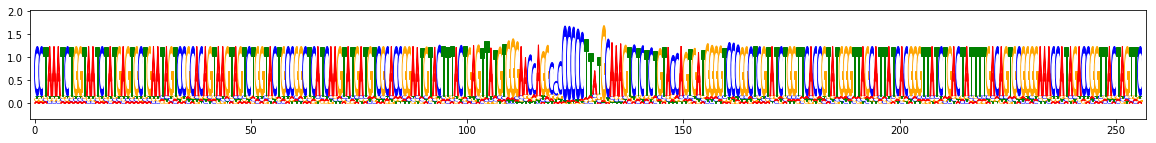

Sequence after 5 iterations


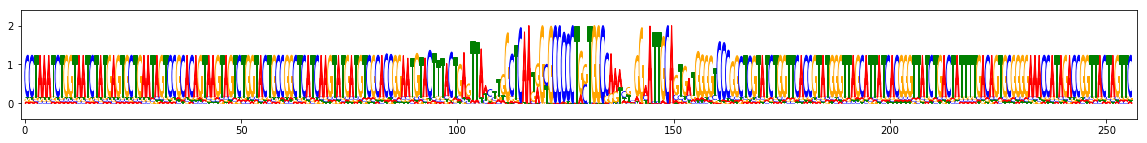

Sequence after 10 iterations


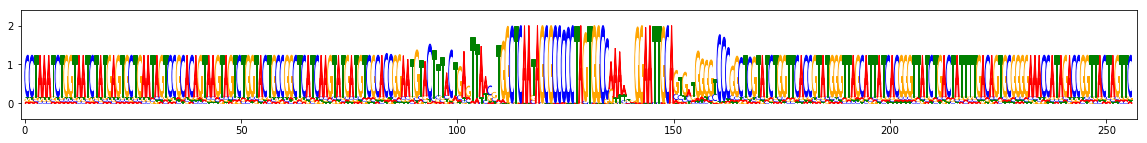

Sequence after 15 iterations


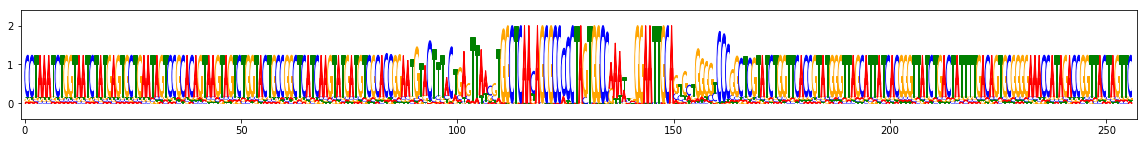

Final sequence


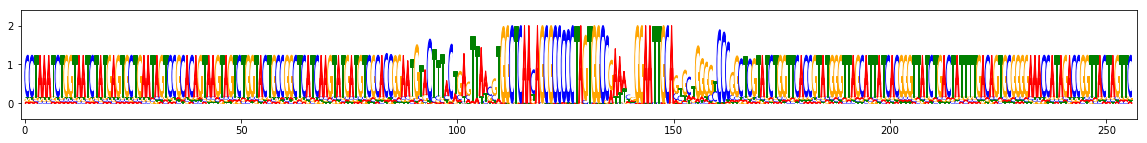

Model Prediction: 2311.4404
Masked average prediciton difference


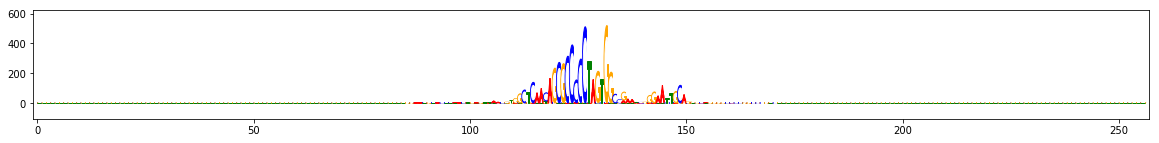

Information Content of Softmax prediction difference


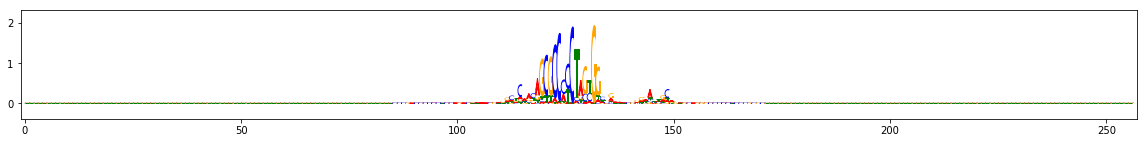

Weighted log-odds of the Sequence Distribution


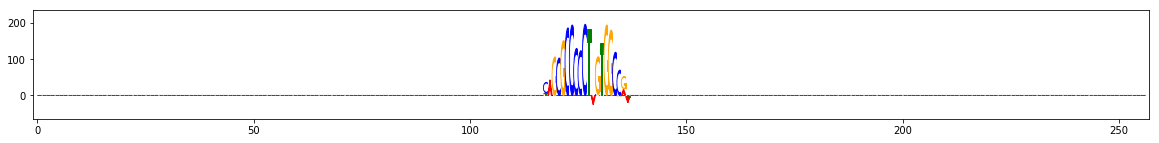

PWM score: 2269.6159091408986


In [4]:
dream = reg.gumbel_dream(seq, 'adverse', viz=True)

In [5]:
# types of dreams:
#standard: update is average gradient @ base * p(base) * step
#adversarial: update is standard - 1/10 * step
#blocked: dream only outside the pwm region (should I allow the max pwm to move around? doesn't currently.)
#constrained: dream orthogal to the pwm score (DOESN'T WORK)
#strict: gradients only apply to a base if that base was in the discrete sequence chosen. 

In [6]:
dream = sigmodel.dream(seq, viz=False, num_iterations = 40)

print('initial sequence')
seq.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(seq)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(seq.discrete_seq()))[0][0]))
sigmodel.get_importance(seq, viz=True)
print('PWM score: ' + str(seq.find_pwm(viz=True)[2]))

print('final sequence')
dream.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(dream)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(dream.discrete_seq()))[0][0]))
sigmodel.get_importance(dream, viz=True)
print('PWM score: ' + str(dream.find_pwm(viz=True)[2]))

NameError: name 'sigmodel' is not defined

In [ ]:
dream = sigmodel.dream(seq, viz=False, num_iterations = 40, step=1)

print('initial sequence')
seq.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(seq)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(seq.discrete_seq()))[0][0]))
sigmodel.get_importance(seq, viz=True)
print('PWM score: ' + str(seq.find_pwm(viz=True)[2]))

print('final sequence')
dream.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(dream)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(dream.discrete_seq()))[0][0]))
sigmodel.get_importance(dream, viz=True)
print('PWM score: ' + str(dream.find_pwm(viz=True)[2]))